<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Simi_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de los datos

In [ ]:
#Importamos librerías generales.
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import glob
from google.colab.patches import cv2_imshow
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold


#Importo TensorFlow y Keras.
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import StratifiedKFold

In [ ]:
!unzip '/content/Weapons.zip'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Weapons/train/Knives/1537.jpg  
  inflating: Weapons/train/Knives/1538.jpg  
  inflating: Weapons/train/Knives/1539.jpg  
  inflating: Weapons/train/Knives/154.jpg  
  inflating: Weapons/train/Knives/1540.jpg  
  inflating: Weapons/train/Knives/1541.jpg  
  inflating: Weapons/train/Knives/1542.jpg  
  inflating: Weapons/train/Knives/1543.jpg  
  inflating: Weapons/train/Knives/1544.jpg  
  inflating: Weapons/train/Knives/1545.jpg  
  inflating: Weapons/train/Knives/1546.jpg  
  inflating: Weapons/train/Knives/1547.jpg  
  inflating: Weapons/train/Knives/1548.jpg  
  inflating: Weapons/train/Knives/1549.jpg  
  inflating: Weapons/train/Knives/155.jpg  
  inflating: Weapons/train/Knives/1550.jpg  
  inflating: Weapons/train/Knives/1551.jpg  
  inflating: Weapons/train/Knives/1552.jpg  
  inflating: Weapons/train/Knives/1553.jpg  
  inflating: Weapons/train/Knives/1554.jpg  
  inflating: Weapons/train/Knives/1555.jp

In [ ]:
#Borramos el archivo de lectura y revisamos las carpetas que haya en el documento.
import os
os.listdir('/content/Weapons/train/')

['Knives', 'Pistol Hand Guns']

Ya tenemos las 3 carpetas, procedemos a revisar la integridad de los datos.

## Revisión de los datos

In [ ]:
knives_data=np.array(glob.glob("/content/Weapons/train/Knives/*.jpg"))
guns_data=glob.glob("/content/Weapons/train/Pistol Hand Guns/*.jpg")


In [ ]:
print(f"En total hay {len(knives_data) + len(guns_data)} datos")
print(f"Papel: {len(knives_data)} entradas")
print(f"Piedra: {len(guns_data)} entradas")


En total hay 5527 datos
Papel: 3534 entradas
Piedra: 1993 entradas


In [ ]:
#Creación de array con todas las rutas diferentes, de las 3 opciones posibles.
images=np.concatenate([knives_data,guns_data],axis=None)

En total, cada set tiene en aproximado el 33% de la cantidad de las entradas, en este caso no se enfrenta el problema de desbalance.

In [ ]:
img=plt.imread('/content/Weapons/train/Knives/1.jpg')

In [ ]:
img.shape

(100, 100, 3)

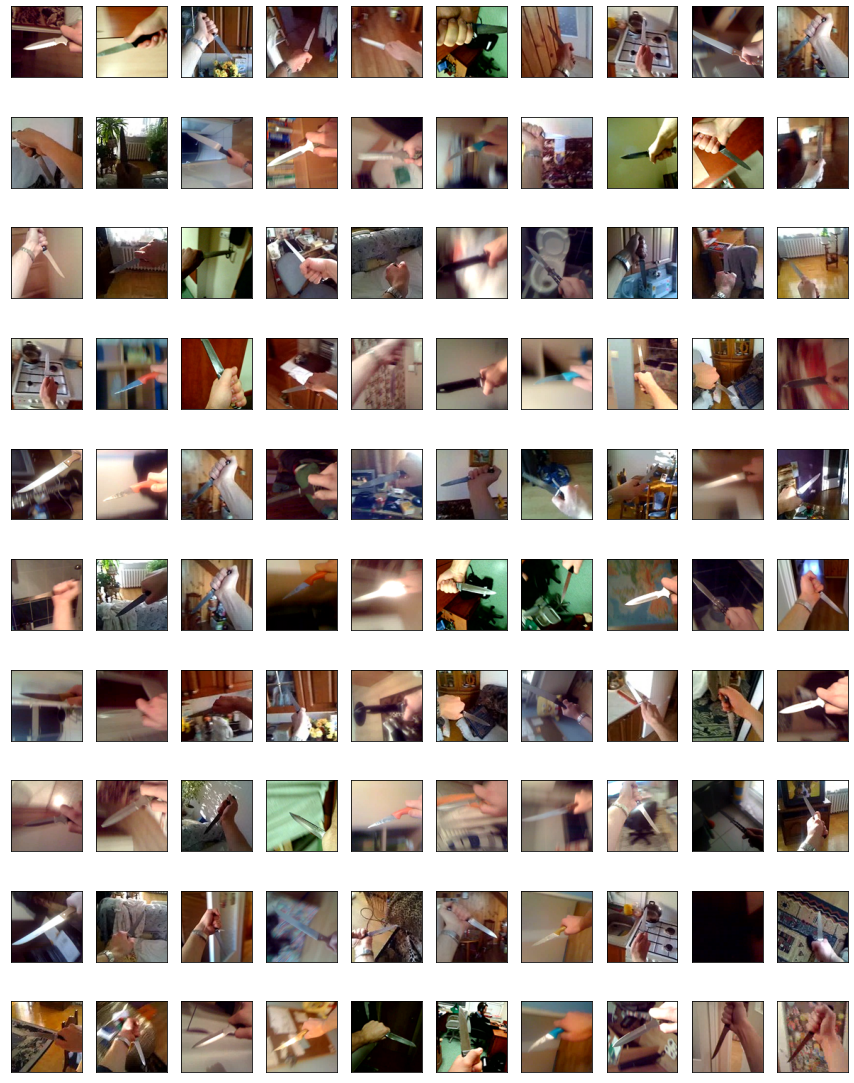

In [ ]:
#Imprimo 100 imágenes aleatoriamente para observar diferentes fotos.
plt.figure(figsize=(15,20))
for i in range(0,2000,20):
    img=plt.imread(images[i])
    plt.subplot(10,10,(i/20)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
plt.show()

In [ ]:
datagen_train = ImageDataGenerator(rescale=1.0/255.0,
                              horizontal_flip=True,
                              vertical_flip=True)

datagen_test = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
#Construyo los conjuntos de prueba y de entrenamiento.
batch_size=64
train_it = datagen_train.flow_from_directory('/content/Weapons/train', class_mode='categorical', batch_size=batch_size, target_size=(100, 100))
test_it = datagen_test.flow_from_directory('/content/Weapons/test', class_mode='categorical', batch_size=batch_size, target_size=(100, 100),shuffle=False)

Found 5595 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## Entrenamiento de red

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(120, (3, 3), input_shape = (100, 100, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation = 'softmax'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(120, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.05))
classifier.add(Dense(units = 128, activation = 'softmax'))

classifier.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs=30
history = classifier.fit(train_it,epochs = epochs,validation_data = test_it)

Epoch 1/30
88/88 [==============================] - 14s 135ms/step - loss: 0.6599 - accuracy: 0.6316 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 2/30
88/88 [==============================] - 12s 136ms/step - loss: 0.5786 - accuracy: 0.6316 - val_loss: 0.5733 - val_accuracy: 0.5000
Epoch 3/30
88/88 [==============================] - 12s 134ms/step - loss: 0.5058 - accuracy: 0.8379 - val_loss: 0.5096 - val_accuracy: 0.9200
Epoch 4/30
88/88 [==============================] - 12s 134ms/step - loss: 0.4505 - accuracy: 0.9332 - val_loss: 0.4592 - val_accuracy: 0.9200
Epoch 5/30
88/88 [==============================] - 12s 137ms/step - loss: 0.4107 - accuracy: 0.9326 - val_loss: 0.4354 - val_accuracy: 0.9000
Epoch 6/30
88/88 [==============================] - 12s 132ms/step - loss: 0.3742 - accuracy: 0.9373 - val_loss: 0.4044 - val_accuracy: 0.9000
Epoch 7/30
88/88 [==============================] - 12s 139ms/step - loss: 0.3379 - accuracy: 0.9464 - val_loss: 0.3744 - val_accuracy: 0.8800

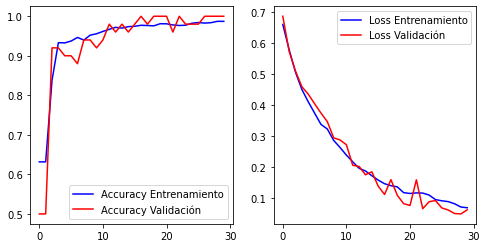

In [ ]:
#Imprimo las gráficas de precisión y error.
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Accuracy Entrenamiento')
ax[0].plot(epoch,val_acc,'red',label='Accuracy Validación')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Loss Entrenamiento')
ax[1].plot(epoch,val_loss,'red',label='Loss Validación')
ax[1].legend()
plt.show()

In [ ]:
#Obtenemos las predicciones
predictions=classifier.predict(test_it)
predictions

1/1 [==============================] - 0s 172ms/step


array([[0.9673594 , 0.03264062],
       [0.96735674, 0.03264331],
       [0.9673479 , 0.03265212],
       [0.9673605 , 0.0326395 ],
       [0.9673596 , 0.0326404 ],
       [0.9673601 , 0.03263997],
       [0.96736044, 0.03263956],
       [0.967334  , 0.03266602],
       [0.9673556 , 0.03264439],
       [0.96735996, 0.03264002],
       [0.9673565 , 0.03264344],
       [0.9673605 , 0.0326395 ],
       [0.9673587 , 0.03264124],
       [0.9673516 , 0.03264843],
       [0.55431575, 0.44568425],
       [0.9271464 , 0.07285359],
       [0.966162  , 0.03383798],
       [0.9673582 , 0.03264185],
       [0.9672616 , 0.03273842],
       [0.9671496 , 0.03285039],
       [0.8828248 , 0.11717518],
       [0.7568998 , 0.24310029],
       [0.88097906, 0.11902091],
       [0.9667244 , 0.03327563],
       [0.9660692 , 0.03393079],
       [0.04838693, 0.95161307],
       [0.04838926, 0.9516107 ],
       [0.04838693, 0.95161307],
       [0.04840783, 0.9515921 ],
       [0.04838693, 0.95161307],
       [0.

In [ ]:
#Creamos las clases y los label.
class_names=['Knives', 'Pistol Hand Guns']

In [ ]:
predictions_label=[]
for i in range(len(predictions)):
  predictions_label.append(class_names[np.argmax(predictions[i])])

In [ ]:
#Obtengo los índices de cada uno de los resultados
train_it.class_indices

{'Knives': 0, 'Pistol Hand Guns': 1}

In [ ]:
predictions_label_def=[]
for i in range(len(predictions_label)):
  if predictions_label[i] =='Knives':
    predictions_label_def.append(0)
  elif predictions_label[i] =='Pistol Hand Guns':
    predictions_label_def.append(1)

In [ ]:
labels_test=test_it.labels
labels_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

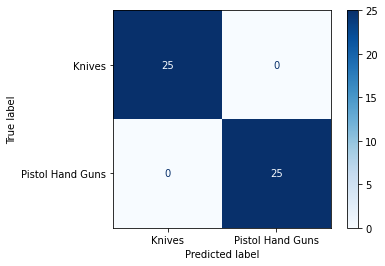

In [ ]:
#Imprimimos la matriz de confusión de nuestro problema.
cm = confusion_matrix(labels_test, predictions_label_def)
cm
train_it.class_indices
classes=list(train_it.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions_label_def, target_names=classes))

                  precision    recall  f1-score   support

          Knives       1.00      1.00      1.00        25
Pistol Hand Guns       1.00      1.00      1.00        25

        accuracy                           1.00        50
       macro avg       1.00      1.00      1.00        50
    weighted avg       1.00      1.00      1.00        50



## Pruebas Modelo Construído

Queremos revisar si con imágenes externas (no del dataset) el modelo sigue funcionando bien.

In [ ]:
path='/content/pistola.jfif'
img=cv2.imread(path)
img.shape

(118, 174, 3)

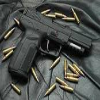

In [ ]:
#Le cambio el tamaño al que utilizo para predecir.
imgR=cv2.resize(img,(100,100)) ## Para achicar la imagen un poco
cv2_imshow(imgR)

In [ ]:
#Ajusto el formato, por lo tanto le agrego el número de la foto.
imgR=(np.expand_dims(imgR,0))
imgR.shape

(1, 100, 100, 3)

In [ ]:
#Ajusto la imagen a la predicción y obtengo el resultado.
prediction_s=classifier.predict(imgR)
prediction_s
class_names[np.argmax(prediction_s)]

1/1 [==============================] - 1s 531ms/step


'Pistol Hand Guns'

In [ ]:
classifier.save('trading_model.h5')